# Assignment 1 Brief 

## Deadline: Tuesday, October 29, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 1 to 5

### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_1_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to express an objective function and its gradients in matrix form.

* Being able to use numpy and pandas to preprocess a dataset.

* Being able to use numpy to build a machine learning pipeline for supervised learning. 


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# Regularisation for Linear Regression

Regularisation is a technique commonly used in Machine Learning to prevent overfitting. It consists on adding terms to the objective function such that the optimisation procedure avoids solutions that just learn the training data. Popular techniques for regularisation in Supervised Learning include Lasso Regression, Ridge Regression and the Elastic Net. 

In this Assignment, you will be looking at Ridge Regression and devising equations to optimise the objective function in Ridge Regression using two methods: a closed-form derivation and the update rules for stochastic gradient descent. You will then use those update rules for making predictions on a Air Quaility dataset.

## Ridge Regression

Let us start with a data set for training $\mathcal{D} = \{\mathbf{y}, \mathbf{X}\}$, where the vector $\mathbf{y}=[y_1, \cdots, y_n]^{\top}$ and $\mathbf{X}$ is the design matrix from Lab 3, this is, 

\begin{align*}
    \mathbf{X} = 
                \begin{bmatrix}
                        1 & x_{1,1} & \cdots & x_{1, D}\\
                        1 & x_{2,1} & \cdots & x_{2, D}\\
                   \vdots &  \vdots\\
                        1 & x_{n,1} & \cdots & x_{n, D}
                \end{bmatrix}
               = 
               \begin{bmatrix}
                      \mathbf{x}_1^{\top}\\
                       \mathbf{x}_2^{\top}\\
                          \vdots\\
                        \mathbf{x}_n^{\top}
                \end{bmatrix}.
\end{align*}

Our predictive model is going to be a linear model

$$ f(\mathbf{x}_i) = \mathbf{w}^{\top}\mathbf{x}_i,$$

where $\mathbf{w} = [w_0\; w_1\; \cdots \; w_D]^{\top}$.

The **objetive function** we are going to use has the following form

$$ J(\mathbf{w}, \alpha) = \frac{1}{n}\sum_{i=1}^n (y_i - f(\mathbf{x}_i))^2 + \frac{\alpha}{2}\sum_{j=0}^D w_j^2,$$

where $\alpha>0$ is known as the *regularisation* parameter.

The first term on the right-hand side (rhs) of the expression for $J(\mathbf{w}, \alpha)$ is very similar to the least-squares objective function we have seen before, for example in Lab 3. The only difference is on the term $\frac{1}{n}$ that we use to normalise the objective with respect to the number of observations in the dataset. 

The first term on the rhs is what we call the "fitting" term whereas the second term in the expression is the regularisation term. Given $\alpha$, the two terms in the expression have different purposes. The first term is looking for a value of $\mathbf{w}$ that leads the squared-errors to zero. While doing this, $\mathbf{w}$ can take any value and lead to a solution that it is only good for the training data but perhaps not for the test data. The second term is regularising the behavior of the first term by driving the $\mathbf{w}$ towards zero. By doing this, it restricts the possible set of values that $\mathbf{w}$ might take according to the first term. The value that we use for $\alpha$ will allow a compromise between a value of $\mathbf{w}$ that exactly fits the data (first term) or a value of $\mathbf{w}$ that does not grow too much (second term).

This type of regularisation has different names: ridge regression, Tikhonov regularisation or $\ell_2$ norm regularisation. 

### Question 1: $J(\mathbf{w}, \alpha)$ in matrix form (2 marks)

Write the expression for $J(\mathbf{w}, \alpha)$ in matrix form. Include ALL the steps necessary to reach the expression.

#### Question 1 Answer

$$ J(\mathbf{w}, \alpha) = \frac{1}{n}\sum_{i=1}^n (y_i - f(\mathbf{x}_i))^2 + \frac{\alpha}{2}\sum_{j=0}^D w_j^2,$$
defining 
$$
\mathbf{y} = \begin{bmatrix}y_1\\y_2\\ \vdots \\ y_n\end{bmatrix}
$$

and defining
$$
\mathbf{f}(\mathbf{X}; \mathbf{w}) = \begin{bmatrix}f(\mathbf{x}_1; \mathbf{w})\\f(\mathbf{x}_2; \mathbf{w})\\ \vdots \\ f(\mathbf{x}_n; \mathbf{w})\end{bmatrix}.
$$

ignore the dependence of $\mathbf{f}$ on $\mathbf{w}$ and $\mathbf{X}$ and simply summarise it by a vector of numbers
$$
\mathbf{f} = \begin{bmatrix}f_1\\f_2\\ \vdots \\ f_n\end{bmatrix}.
$$


because $\mathbf{w}$ and $\mathbf{x}_i$ are two column vectors,$\mathbf{f}$ is the inner products between $\mathbf{w} $ and $\mathbf{x}_i$, they satisfy commutative law, then we have

$$ f(\mathbf{x}_i) = \mathbf{w}^{\top}\mathbf{x}_i =\mathbf{x}_i^{\top}\mathbf{w} $$

so vector $\mathbf{f}$ is a series inner product between $\mathbf{w}$ and $\mathbf{x}_i$

then rewrite it as 
$$
\mathbf{f} = \mathbf{X}\mathbf{w}.
$$
That is to say, $\mathbf{f}$ is a n dimensional vector (which we can intepret as a n×1 dimensional matrix), and $\mathbf{X}$ is a n×n dimensional matrix and $\mathbf{w}$ is a n dimensional vector (n×1 dimensional matrix).


because
$$
\sum_{j=0}^{D} w^2_j = \mathbf{w}^\top\mathbf{w},
$$

and $\alpha$ is given,then rewrite the objective function

$$ J(\mathbf{w}, \alpha) = \frac{1}{n}(\mathbf{y} - \mathbf{X}\mathbf{w})^\top(\mathbf{y} - \mathbf{X}\mathbf{w}) + \frac{\alpha}{2}\mathbf{w}^\top\mathbf{w}
$$


## Optimising the objective function with respect to $\mathbf{w}$

There are two ways we can optimise the objective function with respect to $\mathbf{w}$. The first one leads to a closed form expression for $\mathbf{w}$ and the second one using an iterative optimisation procedure that updates the value of $\mathbf{w}$ at each iteration by using the gradient of the objective function with respect to $\mathbf{w}$,
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \eta \frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}},
$$
where $\eta$ is the *learning rate* parameter and $\frac{d J(\mathbf{w}, \alpha)}{d\mathbf{w}}$ is the gradient of the objective function.

### Question 2: Derivative of $J(\mathbf{w}, \alpha)$ wrt $\mathbf{w}$ (2 marks)

Find the closed-form expression for $\mathbf{w}$ by taking the derivative of $J(\mathbf{w}, \alpha)$ with respect to 
$\mathbf{w}$, equating to zero and solving for $\mathbf{w}$. Write the expression in matrix form. 

Also, write down the specific update rule for $\mathbf{w}_{\text{new}}$ by using the equation above.

#### Question 2 Answer

The objective function in matrix form:
$$
J(\mathbf{w}, \alpha) = \frac{1}{n}(\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f}) + \frac{\alpha}{2}\mathbf{w}^\top\mathbf{w}
$$

because
$$ f(\mathbf{x}_i) = \mathbf{w}^{\top}\mathbf{x}_i,$$

as we mentioned in question 1
$$
\mathbf{f} = \mathbf{X}\mathbf{w}
$$
Rewrite the objective function
$$
J(\mathbf{w}, \alpha) = \frac{1}{n}(\mathbf{y} - \mathbf{X}\mathbf{w})^\top(\mathbf{y} - \mathbf{X}\mathbf{w}) + \frac{\alpha}{2}\mathbf{w}^\top\mathbf{w}
$$ 

so
$$
\frac{d J(\mathbf{w}, \alpha)}{d \mathbf{w}} = - \frac{2}{n}\mathbf{X}^\top \mathbf{y} + \frac{2}{n}\mathbf{X}^\top\mathbf{X}\mathbf{w} + \alpha\mathbf{w}
$$

let$\frac{d J(\mathbf{w}, \alpha)}{d \mathbf{w}}=\mathbf{0}$
$$ \mathbf{0} = - \frac{2}{n}\mathbf{X}^\top \mathbf{y} + \frac{2}{n}\mathbf{X}^\top\mathbf{X}\mathbf{w} + \alpha\mathbf{w}$$
where $\mathbf{0}$ is a vector of zero,then we have
$$
\mathbf{w}^* = \left[\frac{2}{n}\mathbf{X}^\top\mathbf{X} + \alpha\mathbf{I}\right]^{-1}\frac{2}{n}\mathbf{X}^\top \mathbf{y}
$$
where $\mathbf{I}$ is a identity matrix

so
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} + \eta (\frac{2}{n}\mathbf{X}^\top \mathbf{y} - \frac{2}{n}\mathbf{X}^\top\mathbf{X}\mathbf{w} - \alpha\mathbf{w})
$$

# Using ridge regression to predict air quality

Our dataset comes from a popular machine learning repository that hosts open source datasets for educational and research purposes, the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We are going to use ridge regression for predicting air quality. The description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Air+Quality).

In [1]:
import pods
pods.util.download_url('https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip')
import zipfile
zip = zipfile.ZipFile('./AirQualityUCI.zip', 'r')
for name in zip.namelist():
    zip.extract(name, '.')

[===========================   ]   1.328/1.472MB                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [2]:
# The .csv version of the file has some typing issues, so we use the excel version
import pandas as pd 
air_quality = pd.read_excel('./AirQualityUCI.xlsx', usecols=range(2,15))

We can see some of the rows in the dataset 

The target variable corresponds to the CO(GT) variable of the first column. The following columns correspond to the variables in the feature vectors, *e.g.*, PT08.S1(CO) is $x_1$ up until AH which is $x_D$. The original dataset also has a date and a time columns that we are not going to use in this assignment.

Before designing our predictive model, we need to think about three stages: the preprocessing stage, the training stage and the validation stage. The three stages are interconnected and *it is important to remember that the testing data that we use for validation has to be set aside before preprocessing*. Any preprocessing that you do has to be done only on the training data and several key statistics need to be saved for the test stage.

Separating the dataset into training and test before any preprocessing has happened help us to recreate the real world scenario where we will deploy our system and for which the data will come without any preprocessing.

We are going to use *hold-out validation* for testing our predictive model so we need to separate the dataset into a training set and a test set.

### Question 3: Splitting the dataset (1 mark)

Split the dataset into a training set and a test set. The training set should have 70% of the total observations and the test set, the 30%. For making the random selection make sure that you use a random seed that corresponds to the last five digits of your student UCard. Make sure that you comment your code.

#### Question 3 Answer

In [5]:
import numpy as np

MyStudentID = 14433
training_number = round(0.7 * air_quality.shape[0])      # the number of training data
test_number = air_quality.shape[0] - training_number     # the number of test data


# generate a random sequence for the data according to UCard number
np.random.seed(MyStudentID)
rearranged_air_quality = air_quality.reindex(np.random.permutation(air_quality.index)) 


training_data = rearranged_air_quality[0:training_number]   # the training data for Q3         
test_data = rearranged_air_quality[training_number:air_quality.shape[0]] # the test data for Q3


## Preprocessing the data

The dataset has missing values tagged with a -200 value. Before doing any work with the training data, we want to make sure that we deal properly with the missing values. 

### Question 4: Missing values (3 marks)

Make some exploratory analysis on the number of missing values per column in the training data. 

* Remove the rows for which the target feature has missing values. We are doing supervised learning so we need all our data observations to have known target values.

* Remove features with more than 20% of missing values. For all the other features with missing values, use the mean value of the non-missing values for imputation.

#### Question 4 Answer

In [63]:
preprocessed_training_data = training_data[training_data['CO(GT)']!= -200] # Remove the rows that the target feature equals to -200

In [64]:
total = preprocessed_training_data.shape[0] # obtain the rows number of training data
col_total = preprocessed_training_data.shape[1] #obtain the column number of training data
selected_data = preprocessed_training_data.copy()  # In the next few steps, it may change the original data, just in case

In [65]:
# iterate through the whole columns, put all the columns that should be removed into a list,then delete the columns shown in the list
col_list = []
for col_number in range(col_total):
    if ((selected_data.iloc[:,col_number] == -200).sum())/total > 0.2:
        col_list.append(selected_data.columns[col_number])

selected_data.drop(columns=col_list,axis=1,inplace=True)

In [66]:
# tranfer -200 into NaN
for j in range(selected_data.shape[1]):
    for i in range(selected_data.shape[0]):
        if selected_data.iloc[i,j] == -200:
            selected_data.iloc[i,j] = np.nan

In [67]:
selected_data.fillna(selected_data.mean(),inplace=True) # use fillna() to fill NaNs with mean values

### Question 5: Normalising the training data (2 marks)

Now that you have removed the missing data, we need to normalise the input vectors. 

* Explain in a sentence why do you need to normalise the input features for this dataset.

* Normalise the training data by substracting the mean value for each feature and dividing the result by the standard deviation of each feature. Keep the mean values and standard deviations, you will need them at test time.

#### Question 5 Answer

We can speed up gradient descent by having each of our input values in roughly the same range,or oscillate would inefficiently down to the optimum when the variables are very uneven


In [68]:
input_features = selected_data.iloc[:,1:12] # We should only normalise the input features X, target y (CO(GT)) stay the same
normalised_data = (input_features - input_features.mean())/input_features.std()
normalised_data.insert(0,'CO(GT)',selected_data.iloc[:,0]) #put y back to data

In [76]:
normalised_data

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
19,1.9,8.068445e-01,-4.190658e-01,-3.083908e-01,-5.317886e-01,1.325301e+00,-6.563652e-02,2.687408e-01,-6.222881e-01,-1.084921e+00,1.599036e+00,-3.810828e-01
1377,0.6,-1.340723e+00,-1.082963e+00,-1.281608e+00,4.932953e-15,1.581584e+00,1.445833e-14,-1.793733e-01,-1.186147e+00,-4.343811e-01,1.084436e+00,2.067628e-01
5508,1.4,-6.159192e-01,-2.388378e-01,-9.970696e-02,-1.364510e-01,-3.789832e-01,-1.295012e+00,-5.875533e-02,-2.264543e-01,-2.348824e-01,1.631382e+00,9.363896e-01
2582,2.2,-1.070390e-01,2.917797e-01,4.465255e-01,-3.871529e-01,-3.858831e-01,-1.292249e-01,9.588220e-01,4.569726e-01,4.937217e-01,-5.813948e-01,8.791423e-02
3588,0.6,-1.389744e+00,-9.663456e-01,-1.072924e+00,-1.023550e+00,5.692651e-01,-1.506974e+00,2.723959e-01,-6.845895e-01,5.660039e-01,8.330178e-01,1.834906e+00
4418,2.6,1.100521e-01,3.608575e-01,5.119195e-01,2.444230e-01,-1.032948e-02,9.305819e-01,9.548951e-02,2.102844e-01,1.158718e+00,-1.128340e+00,2.774689e-01
4334,3.4,9.247274e-01,1.599545e+00,1.542837e+00,-1.171663e-01,-1.172476e+00,-8.922858e-01,1.498313e+00,1.107046e+00,9.360885e-01,-4.328962e-01,9.609484e-01
7177,5.0,-2.653807e-14,7.082285e-15,-3.498560e-15,2.276072e+00,1.792987e-15,1.596141e+00,-1.329714e-14,-1.602583e-14,-5.341394e-15,-1.295427e-14,1.969678e-15
8961,1.0,-2.774439e-01,-1.014330e+00,-1.155628e+00,-6.320693e-01,-7.144319e-02,-4.514062e-01,-9.820313e-01,-8.482092e-01,-6.252060e-01,9.756353e-01,-1.324526e-01
7746,1.0,-1.053603e+00,-1.012149e+00,-1.151781e+00,-4.344006e-01,7.200780e-01,-2.352056e-01,-1.729132e+00,-1.153423e+00,-1.281528e+00,-5.299350e-01,-1.508633e+00


## Training and validation stages

We have now curated our training data by removing data observations and features with a large amount of missing values. We have also normalised the feature vectors. We are now in a good position to work on developing the prediction model and validating it. We will use both the closed form expression for $\mathbf{w}$ and gradient descent for iterative optimisation. 

We first organise the dataframe into the vector of targets $\mathbf{y}$ and the design matrix $\mathbf{X}$.

In [77]:
# Write your code here to get y and X
y = normalised_data.iloc[:,0] # the target y for training data
X = normalised_data.iloc[:,1:normalised_data.shape[1]]

# add a column of vector to design matrix,each line of value for this vector is 1
X = np.hstack((np.ones(X.shape[0]).reshape(X.shape[0],1), X))  # the design matrix for training data

In [325]:
X

array([[ 1.        ,  0.80684454, -0.4190658 , ..., -1.08492054,
         1.59903562, -0.3810828 ],
       [ 1.        , -1.34072344, -1.082963  , ..., -0.4343811 ,
         1.08443634,  0.20676276],
       [ 1.        , -0.61591925, -0.23883781, ..., -0.23488236,
         1.63138181,  0.93638955],
       ...,
       [ 1.        , -0.94855885, -1.25465644, ..., -1.38272299,
         1.23881616, -0.86122189],
       [ 1.        , -0.66493982, -0.45641411, ..., -0.65990145,
        -0.62109252, -1.13910134],
       [ 1.        , -0.9205471 , -1.21825612, ..., -0.69170561,
         1.46229921,  0.06869986]])

### Question 6: training with closed form expression for $\mathbf{w}$ (3 marks)

To find the optimal value of $\mathbf{w}$ using the closed form expression that you derived before, we need to know the value of the regularisation parameter $\alpha$ in advance. We will determine the value by using part of the training data for finding the parameters $\mathbf{w}$ and another part of the training data to choose the best $\alpha$ from a set of predefined values.

* Use `np.logspace(start, stop, num)` to create a set of values for $\alpha$ in log scale. Use the following parameters `start=-3`, `stop=2` and `num=20`. 

* Randomly split the training data into what is properly called the training set and the validation set. As before, make sure that you use a random seed that corresponds to the last five digits of your student UCard. Use 70% of the data for the training set and 30% of the data for the validation set.

* For each value that you have for $\alpha$ from the previous step, use the training set to compute $\mathbf{w}$ and then measure the mean-squared error (MSE) over the validation data. After this, you will have `num=20` MSE values. Choose the value of $\alpha$ that leads to the lower MSE and save it. You will use it at the test stage.

* What was the best value of $\alpha$? Is there any explanation for that?

#### Question 6 Answer

In [80]:
start = -3
stop = 2
num = 20
a_range = np.logspace(start, stop, num) 

MyStudentID = 14433
training_set_number = round(0.7 * normalised_data.shape[0])      # the number of training set
validation_set_number = normalised_data.shape[0] - training_set_number     # the number of validation set


# generate a random sequence for the data according to UCard number
np.random.seed(MyStudentID)
rearranged_normalised_data = normalised_data.reindex(np.random.permutation(normalised_data.index)) 


training_set = rearranged_normalised_data[0:training_set_number]   # training set               
validation_set = rearranged_normalised_data[training_set_number:normalised_data.shape[0]] #validation set

In [81]:
y1 = training_set.iloc[:,0]# target y1 for training set
X1 = training_set.iloc[:,1:training_set.shape[1]]
X1 = np.hstack((np.ones(X1.shape[0]).reshape(X1.shape[0],1), X1)) # add a column of 1 into design matrix X1

In [82]:
w_values = [] #initialise a list to store w
n = training_set.shape[0]
for a in a_range: #use every a to compute w, 20 a's for every 20 b's
    w = np.dot(np.linalg.inv(np.dot(2/n * X1.T,X1) + a), 2/n * (X1.T).dot(y1)) #as mentioned in lab3, usually we don't directly compute the inverse of a matrix,so we should call the function np.linalg.solve()
    w_values.append(w)

In [83]:
y2 = validation_set.iloc[:,0] # target y2 for validation set
X2 = validation_set.iloc[:,1:validation_set.shape[1]]
X2 = np.hstack((np.ones(X2.shape[0]).reshape(X2.shape[0],1), X2)) #design matrix for validation set

#store all the values into array
MSE_values = []
for w in w_values:
    MSE = ((y2 - X2.dot(w)).T.dot(y2 - X2.dot(w)))/ validation_set.shape[0]
    MSE_values.append(MSE)
    

In [84]:
temp = 1 # initialise a temp to compare
count = 0 # index of the minimum MSE we want

#find the minimum MSE and the index of it
for i in range(len(MSE_values)):
    if MSE_values[i]<temp:
        temp = MSE_values[i]
        count = i 


print(temp)
print(count)



0.25349266800762776
0


In [87]:
a_range[count]

0.001

The index of miminum MSE respond to the index of $\mathbf{a}$ in this case,MSE_value[0] is the minimum MSE ,and a_range[0] is the respoding a

### Question 7: validation with the closed form expression for $\mathbf{w}$ (2 marks)

We are going to deal now with the test data to perform the validation of the model. Remember that the test data might also contain missing values in the target variable and in the input features.

* Remove the rows of the test data for which the labels have missing values. 
* If you remove any feature at the training stage, you also need to remove the same features from the test stage.
* Replace the missing values on each feature variables with the mean value you computed in the training data.
* Normalise the test data using the means and standard deviations computed from the training data
* Compute again $\mathbf{w}$ for the value of $\alpha$ that best performed on the validation set using ALL the training data (not all the training set).
* Report the MSE on the preprocessed test data and an histogram with the absolute error.
* Does the regularisation have any effect on the model? Explain your answer.

#### Question 7 Answer

In [99]:
preprocessed_test_data = test_data[test_data['CO(GT)']!= -200]

In [100]:
preprocessed_test_data.drop(preprocessed_test_data.columns[2],axis=1,inplace=True)

In [101]:
for j in range(preprocessed_test_data.shape[1]):
    for i in range(preprocessed_test_data.shape[0]):
        if preprocessed_test_data.iloc[i,j] == -200:
            preprocessed_test_data.iloc[i,j] = np.nan

C:\Users\Shawn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [102]:
preprocessed_test_data.fillna(selected_data.mean(),inplace=True)

In [107]:
input_X = preprocessed_test_data.iloc[:,1:12] # We should only normalise the input features X, target y (CO(GT)) stay the same
normalised_X = (input_X - input_features.mean())/input_features.std() # use the mean and standard deviation from training data
normalised_X.insert(0,'CO(GT)',preprocessed_test_data.iloc[:,0]) #put y back to data
preprocessed_test_data = normalised_X # Rename it 

In [109]:
preprocessed_test_data

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
1488,4.6,1.961162,2.696449,2.310255,-0.146093,-0.998006,0.527855,2.305358,1.320381,0.782850,-1.038653,-0.089153
4914,3.7,1.684546,1.479952,1.452440,1.199019,-1.345960,0.400678,1.455914,1.417924,0.672982,0.408106,1.559056
7431,4.3,0.934065,0.898336,0.987950,2.090939,-1.234575,0.621118,0.071366,1.258709,-1.249724,1.524051,-0.606037
6585,0.5,-1.602167,-1.114014,-1.342193,0.000000,4.945796,0.000000,-1.590969,-1.585756,-0.454620,-0.731364,-1.048243
2264,0.6,-1.085116,-0.950230,-1.045997,-1.119974,1.116331,-1.676543,0.160550,-1.239638,0.982349,-0.329976,1.191774
2541,1.3,-0.661438,-0.574510,-0.501688,-0.951232,0.454923,-1.061855,0.351346,-1.161604,2.040560,-1.503263,0.870494
8570,5.3,0.945736,1.198490,1.233177,2.399977,-1.086719,2.560565,-0.475436,2.048489,-1.333571,-0.894565,-1.687886
6803,1.0,-1.273028,-1.012695,-1.152743,-0.628212,0.858077,-0.765109,-1.683078,-0.622917,-1.668960,0.252256,-1.448804
7997,1.0,-0.959063,-1.086476,-1.288340,-0.513468,0.890605,0.099693,-1.938934,-1.055251,-1.455005,-0.666671,-1.657050
6090,2.8,0.422850,0.204122,0.361898,0.827787,-0.826493,1.842016,0.073559,0.430542,-0.012253,0.174331,0.126604


In [110]:
a = a_range[0]
# Use the X and y according to Quetion 5
n_training = normalised_data.shape[0]
w = np.dot(np.linalg.inv(np.dot(2/n_training * X.T,X) + a), 2/n_training * (X.T).dot(y))

In [111]:
yt = preprocessed_test_data.iloc[:,0]
Xt = preprocessed_test_data.iloc[:,1:preprocessed_test_data.shape[1]]
Xt = np.hstack((np.ones(Xt.shape[0]).reshape(Xt.shape[0],1), Xt))

MSE_t = ((yt - Xt.dot(w)).T.dot(yt - Xt.dot(w)))/ preprocessed_test_data.shape[0]
MSE_t

0.2210297368124787

(array([1741.,  366.,  113.,   36.,   18.,    9.,    6.,    2.,    0.,
           2.]),
 array([1.21900642e-04, 3.87225723e-01, 7.74329546e-01, 1.16143337e+00,
        1.54853719e+00, 1.93564101e+00, 2.32274484e+00, 2.70984866e+00,
        3.09695248e+00, 3.48405630e+00, 3.87116013e+00]),
 <a list of 10 Patch objects>)

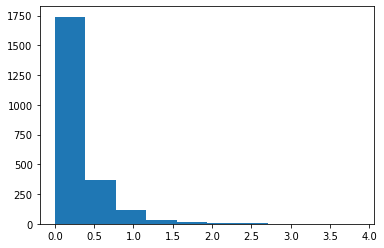

In [112]:
absolute_error = abs(yt - Xt.dot(w)).tolist()

%matplotlib inline 
import pylab as plt # this imports the plotting library in python

plt.hist(absolute_error)


Regularization can reduce the degree of nonlinearity of the model and it also can effectively avoid overfitting problems.

## Question 8: training with gradient descent and validation (5 marks)


Use gradient descent to iteratively compute the value of $\mathbf{w}_{\text{new}}$. Instead of using all the training set to compute the gradient, use a subset of $B$ datapoints in the training set. This is sometimes called minibatch gradient descent where $B$ is the size of the minibacth. When using gradient descent with minibatches, you need to find the best values for three parameters: $\eta$, the learning rate, $B$, the number of datapoints in the minibatch and $\alpha$, the regularisation parameter.

* As you did on Question 6, create a grid of values for the parameters $\alpha$ and $\eta$ using `np.logspace` and a grid of values for $B$ using np.linspace. Because you need to find 
 three parameters, start with `num=5` and see if you can increase it.

* Use the same training set and validation set that you used in Question 6.

* For each value that you have of $\alpha$, $\eta$ and $B$ from the previous step, use the training set to compute $\mathbf{w}$ using minibatch gradient descent and then measure the MSE over the validation data. For the minibatch gradient descent choose to stop the iterative procedure after $500$ iterations.

* Choose the values of $\alpha$, $\eta$ and $B$ that lead to the lower MSE and save them. You will use them at the test stage.

*3 marks of out of the 5 marks*


* Use the test set from Question 7 and provide the MSE obtained by having used minibatch training with the best values for $\alpha$, $\eta$ and $B$ over the WHOLE training data (not only the training set).

* Compare the performance of the closed form solution and the minibatch solution. Are the performances similar? Are the parameters $\mathbf{w}$ and $\alpha$ similar in both approaches? Please comment on both questions.

*2 marks of out of the 5 marks*

#### Question 8 Answer

In [292]:
num = 5

a_q8 = np.logspace(-3, 1, num)
eta_range = np.logspace(-2, -1.2, num)
B_range = np.linspace(50, 500, num)
B_range = B_range.astype(int) # make all the element in B_range become int type
print(a_q8)
print(eta_range)
print(B_range)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01]
[0.01       0.01584893 0.02511886 0.03981072 0.06309573]
[ 50 162 275 387 500]


In [293]:
#obtain the data from training set
y_train = pd.DataFrame(training_set.iloc[:,0])
X_train = training_set.iloc[:,1:training_set.shape[1]]
X_train = pd.DataFrame(np.hstack((np.ones(X_train.shape[0]).reshape(X_train.shape[0],1), X_train)))

np.random.seed(MyStudentID)  # set random seed according to studentID
w_train = np.random.randn(X_train.shape[1],1)   # randomly initialise a column vector w_train


In [294]:
def MBGD(X,y,w,a,eta,B): # define a minibatch gradient descent function for 500 iteration
    w_new = np.zeros(X.shape[1]).reshape(X.shape[1],1)
    for j in range(500):
        for i in range(0,X.shape[0],B):  # for every B data,update gradient for once           
            Xi = np.array(X.iloc[i:i+B]) 
            yi = np.array(y.iloc[i:i+B])
            diff = -2/B * (Xi.T).dot(yi) + 2/B * ((Xi.T).dot(Xi)).dot(w) + a*w # compute the dJ/dw
            w = w - eta * (1.0 / B)* diff #update the w 
            w_new = w
    return w_new

In [295]:
w_train_values = [] #run the minibatch gradient descent,store all the w values in order to compute all the possible MSE
for a in a_q8: # use for loops to compute w, by using different combination of a,eta and B 
    for eta in eta_range:
        for B in B_range:
            w_temp = MBGD(X_train,y_train,w_train,a,eta,B)
            w_train_values.append(w_temp)

In [297]:
len(w_train_values) # so now we have 5 x 5 x 5 = 125 w,through the index of w_train_values,we can know the exact a[],eta[],B[]

125

In [ ]:
y2 = np.array(y2).reshape(y2.shape[0],1) #adjust the dimension of y2 inorder to compute

In [298]:
MSE_q8 = []
for w in w_train_values:
    MSE = ((y2 - X2.dot(w)).T.dot(y2 - X2.dot(w)))/ validation_set.shape[0] #MSE on validation data
    MSE_q8.append(MSE)

In [300]:
temp = MSE_q8[0] # initialise a temp to compare
index = 0 # index of the minimum MSE we want

for i in range(len(MSE_q8)): # look through the all the MSE values to find minimum MSE and output the index
    if MSE_q8[i]<temp:
        temp = MSE_q8[i]
        index = i 
print(temp)
print(index)

[[0.25781885]]
45


In [303]:
#so the minimum MSE is MSE_q8[45] = 0.25781885 in this case,now compute the respoding index of a,eta,B
index_a = int(45/(num*num))
index_eta = (45/5)%num
index_B = 45%num
print(index_a)
print(index_eta)
print(index_B)
#so in this case, when a_q8[1] , eta_range[4], B_range[0],we have the minimum MSE 

1
4.0
0


In [311]:
# use the training data y and X in Question 5 ,use the best a,eta,B to compute w_td 
y_td = pd.DataFrame(y)
X_td = pd.DataFrame(X)
w_td = MBGD(X_td,y_td,w_train,a=a_q8[1],eta=eta_range[4],B=B_range[0])

In [319]:
# use the w_td to compute MSE on the test set
np.array(yt).reshape(yt.shape[0],1) 
MSE_td = ((yt - Xt.dot(w_td)).T.dot(yt - Xt.dot(w_td)))/ preprocessed_test_data.shape[0]


array([[0.22418088]])

In [320]:
print(MSE_td) #the MSE calculated in Q8,using minibatch gradient descent
print(MSE_t) #the MSE calculated in Q7,using closed form

[[0.22418088]]
0.2210297368124787


In [324]:
#the a and w in Q7
print(a_range[0])
print(w)

#the a and w in Q8
print(a_q8[1])
print(w_td)

0.001
[[ 0.34069227]
 [ 0.10433369]
 [ 0.1102101 ]
 [ 0.12582252]
 [ 0.10815551]
 [-0.07930423]
 [ 0.08880714]
 [ 0.08040692]
 [ 0.10196405]
 [-0.00705569]
 [ 0.00438843]
 [-0.0034899 ]]
0.01
[[ 2.15171794]
 [ 0.29331335]
 [ 0.35063348]
 [ 0.31571867]
 [ 0.49817022]
 [ 0.09143795]
 [ 0.10332368]
 [ 0.33329443]
 [-0.17803292]
 [-0.22486161]
 [-0.12949103]
 [-0.00407673]]


In Batch Gradient Descent, parameters are updated after computing the gradient of error with respect to the entire training set. But in Mini-Batch Gradient Descent, parameters are updated after computing the gradient of error with respect to a subset of the training set. Mini-Batch Gradient Descent makes a compromise between the speedy convergence and the noise associated with gradient update which makes it a more flexible and robust algorithm.

By printing out the results, the performances(MSE) are very similar, but parameters w and a are quite different here.These may also affcted by the initialised range of a,eta,B